In [1]:
%config IPCompleter.greedy=True

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
wine=pd.read_csv('E:\CAPGEMINI\Data_Science\winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###  using ggplot map style

In [9]:
plt.style.use('ggplot')

### Finding mean, median and variance along axis=0

In [17]:
display('Mean=',wine.mean(),'Median=',wine.median(),'Variance=',wine.var())

'Mean='

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

'Median='

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

'Variance='

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

** Best quality of wine **

In [21]:
high_quality=wine.loc[wine['quality']>=5,:]
high_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


__ Best quality wine and less sugar __

In [23]:
quality_sugar=(wine['quality']>=5)&(wine['residual sugar']<2)
qs_wine=wine.loc[quality_sugar,:]
qs_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


__ To select the best wine based on quality, sugar quantity, citric acid(sour taste) and alcohol content __

In [26]:
my_fav_factors=(wine['quality']>=7)&(wine['residual sugar']<1.58)&\
               (wine['citric acid']>0.271)&(wine['alcohol']>10.5)
wine.loc[my_fav_factors,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
986,9.8,0.34,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
1001,9.9,0.35,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6,7
1070,9.3,0.33,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,7


__ To find correlation between wine quality and other factors __

correlation coeff for wine quality=
 [[ 1.          0.47616632 -0.05773139  0.01373164]
 [ 0.47616632  1.          0.20563251  0.04207544]
 [-0.05773139  0.20563251  1.         -0.08565242]
 [ 0.01373164  0.04207544 -0.08565242  1.        ]]
Factor which affect the wine quality most=
 Alcohol


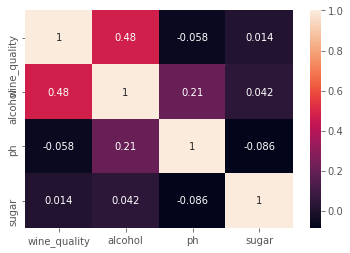

In [29]:
wine_quality=wine['quality']
alcohol=wine['alcohol']
ph=wine['pH']
sugar=wine['residual sugar']
corr_quality=np.corrcoef([wine_quality,alcohol,ph,sugar])
print('correlation coeff for wine quality=\n',corr_quality)
q_factor=[]
q_name_fact=['Alcohol','ph','sugar']
for i in range(1,4):
    q_factor.append(abs(corr_quality[i,0]))
print('Factor which affect the wine quality most=\n',
      q_name_fact[q_factor.index(max(q_factor))])
sns.heatmap(corr_quality,annot=True,xticklabels=['wine_quality','alcohol','ph','sugar'],
            yticklabels=['wine_quality','alcohol','ph','sugar'])

__ To find which acid affect ph level__

correlation coeff for ph=
 [[ 1.         -0.68297819  0.23493729 -0.54190414]
 [-0.68297819  1.         -0.25613089  0.67170343]
 [ 0.23493729 -0.25613089  1.         -0.55249568]
 [-0.54190414  0.67170343 -0.55249568  1.        ]]
Factor which affect the ph most=
 fixed acid


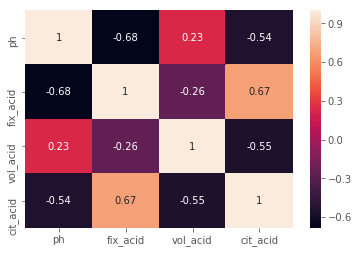

In [30]:
ph=wine['pH']
fixed_acid=wine['fixed acidity']
volatile_acid=wine['volatile acidity']
citric_acid=wine['citric acid']
corr_ph=np.corrcoef(([ph,fixed_acid,volatile_acid,citric_acid]))
print('correlation coeff for ph=\n',corr_ph)
ph_factor=[]
ph_name_fact=['fixed acid','volatile acid','citrix acid']
for i in range(1,4):
    ph_factor.append(abs(corr_ph[i,0]))
print('Factor which affect the ph most=\n',
      ph_name_fact[ph_factor.index(max(ph_factor))])
sns.heatmap(corr_ph,annot=True,xticklabels=['ph','fix_acid','vol_acid','cit_acid'],yticklabels=['ph','fix_acid','vol_acid','cit_acid'])